In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
AwardPlayer = pd.read_csv('data/raw/AwardsPlayers.csv')
AwardPlayer

,playerID,awardID,yearID,lgID,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN
...,...,...,...,...,...,...
6231,stantmi03,TSN All-Star,2017,NL,NaN,OF
6232,blackch02,TSN All-Star,2017,NL,NaN,OF
6233,ozunama01,TSN All-Star,2017,NL,NaN,OF
6234,scherma01,TSN All-Star,2017,NL,NaN,SP


In [3]:
AwardPlayer_clean = (
AwardPlayer
    .drop(['lgID','tie','notes'],axis=1)
    .dropna(axis = 0)
)
AwardPlayer_clean

,playerID,awardID,yearID
0,bondto01,Pitching Triple Crown,1877
1,hinespa01,Triple Crown,1878
2,heckegu01,Pitching Triple Crown,1884
3,radboch01,Pitching Triple Crown,1884
4,oneilti01,Triple Crown,1887
...,...,...,...
6231,stantmi03,TSN All-Star,2017
6232,blackch02,TSN All-Star,2017
6233,ozunama01,TSN All-Star,2017
6234,scherma01,TSN All-Star,2017


In [4]:
Salaries = pd.read_csv('data/raw/Salaries.csv')
Salaries

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


In [5]:
Salaries_clean = (
Salaries
    .drop(['lgID'],axis=1)
    .dropna(axis = 0)
)
Salaries_clean

,yearID,teamID,playerID,salary
0,1985,ATL,barkele01,870000
1,1985,ATL,bedrost01,550000
2,1985,ATL,benedbr01,545000
3,1985,ATL,campri01,633333
4,1985,ATL,ceronri01,625000
...,...,...,...,...
26423,2016,WAS,strasst01,10400000
26424,2016,WAS,taylomi02,524000
26425,2016,WAS,treinbl01,524900
26426,2016,WAS,werthja01,21733615


In [6]:
merged = AwardPlayer_clean.merge(Salaries_clean, on="playerID", how="outer")
merged.head()

,playerID,awardID,yearID_x,yearID_y,teamID,salary
0,bondto01,Pitching Triple Crown,1877.0,NaN,NaN,NaN
1,hinespa01,Triple Crown,1878.0,NaN,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884.0,NaN,NaN,NaN
3,radboch01,Pitching Triple Crown,1884.0,NaN,NaN,NaN
4,oneilti01,Triple Crown,1887.0,NaN,NaN,NaN


In [7]:
merged_clean = (
merged
    .dropna(axis=0)
)
merged_clean.head()

,playerID,awardID,yearID_x,yearID_y,teamID,salary
2153,ayalabo01,TSN Player of the Year,1954.0,1993.0,CIN,112000.0
2154,ayalabo01,TSN Player of the Year,1954.0,1994.0,SEA,180000.0
2155,ayalabo01,TSN Player of the Year,1954.0,1995.0,SEA,250000.0
2156,ayalabo01,TSN Player of the Year,1954.0,1996.0,SEA,325000.0
2157,ayalabo01,TSN Player of the Year,1954.0,1997.0,SEA,900000.0


In [13]:
labels = ['TSN Player of the Year','Pitching Triple Crown','Triple Crown','Rookie of the Year','TSN All-Star','Hutch Award','Gold Glove','World Series MVP']
new_df = merged_clean.loc[merged_clean['awardID'].isin(['TSN Player of the Year','Pitching Triple Crown','Triple Crown','Rookie of the Year','TSN All-Star','Hutch Award','Gold Glove','World Series MVP']
)]
new_df.head()

,playerID,awardID,yearID_x,yearID_y,teamID,salary
2153,ayalabo01,TSN Player of the Year,1954.0,1993.0,CIN,112000.0
2154,ayalabo01,TSN Player of the Year,1954.0,1994.0,SEA,180000.0
2155,ayalabo01,TSN Player of the Year,1954.0,1995.0,SEA,250000.0
2156,ayalabo01,TSN Player of the Year,1954.0,1996.0,SEA,325000.0
2157,ayalabo01,TSN Player of the Year,1954.0,1997.0,SEA,900000.0


In [11]:
merged_clean['awardID'].unique()

array(['TSN Player of the Year', 'Rookie of the Year', 'TSN All-Star',
       'Hutch Award', 'Gold Glove', 'Lou Gehrig Memorial Award',
       'Most Valuable Player', 'World Series MVP',
       'Roberto Clemente Award', 'Silver Slugger', 'All-Star Game MVP',
       'TSN Major League Player of the Year', 'Cy Young Award',
       'TSN Pitcher of the Year', 'Babe Ruth Award',
       'Pitching Triple Crown', 'NLCS MVP', 'TSN Fireman of the Year',
       'Rolaids Relief Man Award', 'ALCS MVP', 'Branch Rickey Award',
       'Comeback Player of the Year', 'Hank Aaron Award',
       'TSN Reliever of the Year', 'Outstanding DH Award', 'Triple Crown',
       'Reliever of the Year Award'], dtype=object)

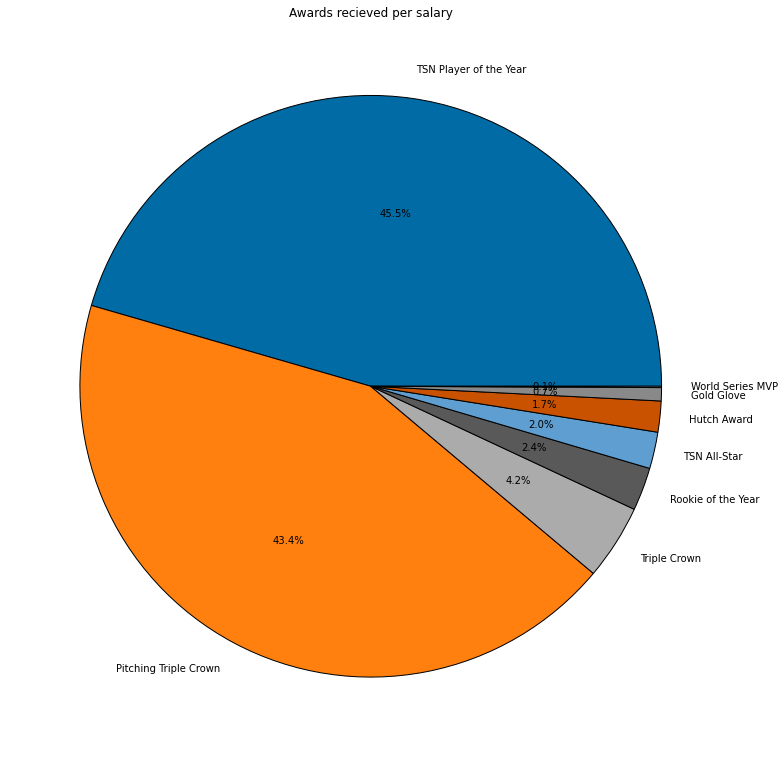

In [14]:
plt.style.use('tableau-colorblind10')
fig = plt.figure(figsize=(11,11))
plt.pie(list(new_df['awardID'].value_counts()), autopct='%1.1f%%',labels = labels, wedgeprops={'edgecolor':'black'})
plt.title('Awards recieved per salary')
plt.tight_layout()
plt.show()